# Tweets of @megmfurr

In [78]:
# import modules
from os import path
from scipy.misc import imread
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from collections import Counter, defaultdict
from datetime import datetime,date
from wordcloud import WordCloud
from PIL import Image
import time
import os 
import tweepy
import csv
import pandas
import matplotlib.pyplot as plt
import functools
import random
import numpy as np

In [39]:
# keys & secrets
consumer_key = '6WkmbplsZlk5vtoRB9ksuOf53'
consumer_secret = 'EbwC3fQeGncUWH3ubIPC5tcRPbKUlO1X8bVsUKLHe2vRb7j7Ra'
access_key = '3051436930-GMhQr6Mr5AWMHl3eJhME2DHnniP9nGfBLTLuxqF'
access_secret = 'WHoOBdVnFHkPpburc7eaIg7qxzKQgrpvsIms9u3RwHgkw'

In [84]:
# directory
d = '/users/margaretfurr/Desktop/'

In [40]:
# get_all_tweets def
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print "getting tweets before %s" % (oldest)
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print "...%s tweets downloaded so far" % (len(alltweets))
        
        #transform the tweepy tweets into a 2D array that will populate the csv	
        outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
        
        #write the csv
        with open('%s_tweets.csv' % screen_name, 'wb') as f:
            writer = csv.writer(f)
            writer.writerow(["id","created_at","text"])
            writer.writerows(outtweets)
        pass


In [4]:
# getting tweets
if __name__ == '__main__':
    #pass in the username of the account you want to download
    get_all_tweets("@megmfurr")

getting tweets before 904838367652798463
...399 tweets downloaded so far
getting tweets before 868279187651653636
...599 tweets downloaded so far
getting tweets before 840643624165613568
...799 tweets downloaded so far
getting tweets before 818242592185917439
...998 tweets downloaded so far
getting tweets before 805462204006957056
...1197 tweets downloaded so far
getting tweets before 790277651705556992
...1397 tweets downloaded so far
getting tweets before 772512940897558527
...1597 tweets downloaded so far
getting tweets before 756090940100608000
...1797 tweets downloaded so far
getting tweets before 741040131143041023
...1996 tweets downloaded so far
getting tweets before 716788922492313599
...2190 tweets downloaded so far
getting tweets before 691039716477632512
...2389 tweets downloaded so far
getting tweets before 627607515740643327
...2546 tweets downloaded so far
getting tweets before 569310957404590079
...2546 tweets downloaded so far


In [5]:
# save csv file as megmfurr_tweets
megmfurr_tweets = pandas.read_csv('@megmfurr_tweets.csv')
megmfurr_tweets

,id,created_at,text
0,950042578371653632,2018-01-07 16:32:56,RT @Impeach45_March: Breaking news on Jan. 20:...
1,950042558838853632,2018-01-07 16:32:51,RT @paix120: I'll be spending my birthday this...
2,949409623899082752,2018-01-05 22:37:48,"RT @dataKateR: ""Data will help if it’s accurat..."
3,949409556936953856,2018-01-05 22:37:32,RT @dataKateR: @biancawylie 🙌🙌🙌 https://t.c...
4,948185045688307713,2018-01-02 13:31:45,RT @SteveCase: 10 Top Risks for 2018 https://t...
5,947538260548603904,2017-12-31 18:41:40,RT @MattSmethurst: This is the only day in his...
6,947529503869407232,2017-12-31 18:06:52,RT @ByteBackDC: We're building on the momentum...
7,947273217550487552,2017-12-31 01:08:29,RT @TIME: How to increase mental toughness: 4 ...
8,947270761487720448,2017-12-31 00:58:43,"RT @cnntech: ""Vehicle data could be the beginn..."
9,947209685748404225,2017-12-30 20:56:02,RT @SunFoundation: While the algorithmic trans...


In [6]:
# retweets
retweets = megmfurr_tweets[megmfurr_tweets['text'].str.contains("RT")]
megmfurr_tweets[megmfurr_tweets['text'].str.contains("RT")]['text'].count() # 1,633

1649

In [7]:
# tweets
tweets = megmfurr_tweets[megmfurr_tweets["text"].str.contains("RT")==False]
megmfurr_tweets[megmfurr_tweets["text"].str.contains("RT")==False]['text'].count() # 895

897

In [8]:
# count by date in datetimes
retweets['id'].groupby(pandas.to_datetime(retweets['created_at']).dt.date).count().mean() # 2.86

2.838209982788296

In [9]:
# count by date in datetimes
tweets['id'].groupby(pandas.to_datetime(tweets['created_at']).dt.date).count().mean()

2.3059125964010283

In [10]:
# tweets about data science
words = ['Data Science','DataScience','datascience','Data Scientist','data science','data','data scientist','Data scientist']
pat = '|'.join(words)

datascience_tweets = megmfurr_tweets[megmfurr_tweets['text'].str.contains(pat)]
megmfurr_tweets[megmfurr_tweets['text'].str.contains(pat)]['text'].count()

442

In [11]:
# data science retweets
datascience_tweets[datascience_tweets['text'].str.contains("RT")]['text'].count() # 322

326

In [12]:
# data science tweets
datascience_tweets[datascience_tweets["text"].str.contains("RT")==False]['text'].count() # 895

116

In [13]:
# wordlist
wordstring = str(tweets['text'])
wordstring += str(tweets['text'])

wordlist = wordstring.split()

# wordfreq
wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [14]:
# print wordstring
print("String\n" + wordstring +"\n")

String
13      Just stopped by @NorfolkAcademy. #12YearSurviv...
16      #MerryChristmas #ScottishBagpipes https://t.co...
23                                https://t.co/i86GOm1vMa
24      #Dance #Georgetown #Holidays #Glow https://t.c...
43      #HappyHolidays #DC. I've been here through two...
50                                https://t.co/3Z3qwmZwyk
62                                https://t.co/8ErrgWjreK
66      created #github #website this weekend https://...
67      creating a #github website and reading about d...
77      Two of the best summers of my life were here #...
78                    I ❤️#Boston https://t.co/pg2GpViZCK
81      #Gratitude #ThisDayIsGood #BostonHarbor https:...
82      @jhagel 2/2 culture, humanities, arts, which s...
83      @jhagel 1/2The future of education is extremel...
95                                https://t.co/rpWmHeVxGX
101                               https://t.co/hPqcYvCZ7p
102                               https://t.co/3xxHtAIYmZ
110    

In [15]:
# list wordlist
print("List\n" + str(wordlist) + "\n")

List
['13', 'Just', 'stopped', 'by', '@NorfolkAcademy.', '#12YearSurviv...', '16', '#MerryChristmas', '#ScottishBagpipes', 'https://t.co...', '23', 'https://t.co/i86GOm1vMa', '24', '#Dance', '#Georgetown', '#Holidays', '#Glow', 'https://t.c...', '43', '#HappyHolidays', '#DC.', "I've", 'been', 'here', 'through', 'two...', '50', 'https://t.co/3Z3qwmZwyk', '62', 'https://t.co/8ErrgWjreK', '66', 'created', '#github', '#website', 'this', 'weekend', 'https://...', '67', 'creating', 'a', '#github', 'website', 'and', 'reading', 'about', 'd...', '77', 'Two', 'of', 'the', 'best', 'summers', 'of', 'my', 'life', 'were', 'here', '#...', '78', 'I', '\xe2\x9d\xa4\xef\xb8\x8f#Boston', 'https://t.co/pg2GpViZCK', '81', '#Gratitude', '#ThisDayIsGood', '#BostonHarbor', 'https:...', '82', '@jhagel', '2/2', 'culture,', 'humanities,', 'arts,', 'which', 's...', '83', '@jhagel', '1/2The', 'future', 'of', 'education', 'is', 'extremel...', '95', 'https://t.co/rpWmHeVxGX', '101', 'https://t.co/hPqcYvCZ7p', '102',

In [33]:
# word frequenceis
print("Frequencies\n" + str(wordfreq) + "\n")

Frequencies
[1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [53]:
# word freq with wordlist
print("Pairs\n" + str(zip(wordlist, wordfreq)))

Pairs
[('13', 'P'), ('Just', 'a'), ('stopped', 'i'), ('by', 'r'), ('@NorfolkAcademy.', 's'), ('#12YearSurviv...', '\n'), ('16', '['), ('#MerryChristmas', '('), ('#ScottishBagpipes', "'"), ('https://t.co...', '1'), ('23', '3'), ('https://t.co/i86GOm1vMa', "'"), ('24', ','), ('#Dance', ' '), ('#Georgetown', "'"), ('#Holidays', 'P'), ('#Glow', "'"), ('https://t.c...', ')'), ('43', ','), ('#HappyHolidays', ' '), ('#DC.', '('), ("I've", "'"), ('been', 'J'), ('here', 'u'), ('through', 's'), ('two...', 't'), ('50', "'"), ('https://t.co/3Z3qwmZwyk', ','), ('62', ' '), ('https://t.co/8ErrgWjreK', "'"), ('66', 'a'), ('created', "'"), ('#github', ')'), ('#website', ','), ('this', ' '), ('weekend', '('), ('https://...', "'"), ('67', 's'), ('creating', 't'), ('a', 'o'), ('#github', 'p'), ('website', 'p'), ('and', 'e'), ('reading', 'd'), ('about', "'"), ('d...', ','), ('77', ' '), ('Two', "'"), ('of', 'i'), ('the', "'"), ('best', ')'), ('summers', ','), ('of', ' '), ('my', '('), ('life', "'"), ('wer

In [41]:
# invert a temporary Counter(wordlist) dictionary so keys are
# frequency of occurrence and values are lists the words encountered
freqword = defaultdict(list)
for word, freq in Counter(wordlist).items():
    freqword[freq].append(word)

# print in order of occurrence (with sorted list of words)
for freq in sorted(freqword):
    print('count {}: {}'.format(freq, sorted(freqword[freq])))

count 1: ['13', 'object', 'object13']
count 2: ['"Emergence:', '"Niggled', '"Put', '"Why', '"develop', '"explore', '"our', '#...', '#12YearSurviv...', '#12Years', '#BostonHarbor', '#DC.', '#DCRats', '#DailyInspiration:', '#Dance', '#DataScience', '#Georgetown', '#Glow', '#Gratitude', '#HappyHolidays', '#Holidays', '#IThinkLikeAnEng...', '#MerryChristmas', '#RethinkCapitalism', '#ScottishBagpipes', '#ThisDayIsGood', '#U...', '#building', '#da...', '#e...', '#edtech,', '#humanities,', '#museumtec...', '#newspace', '#passionate', '#rollingstone', '#structures', '#website', '1/2The', '100', '101', '102', '110', '115', '116', '118', '119', '12', '122', '128', '130', '132', '137', '138', '146', '149', '16', '18%', '1960s', '1985', '2/2', '2010', '23', '24', '2452', '2453', '2454', '2455', '2457', '2458', '2463', '2466', '2473', '2486', '2493', '2497', '2510', '2513', '2519', '2524', '2531', '2532', '2534', '2535', '2536', '2537', '2538', '2539', '2540', '2541', '2542', '2543', '2544', '2545'

In [56]:
# hashtags
hashtaglist = []
for w in wordlist: 
    if w.startswith("#"):
        print(w)
        hashtaglist.append(w)

#12YearSurviv...
#MerryChristmas
#ScottishBagpipes
#Dance
#Georgetown
#Holidays
#Glow
#HappyHolidays
#DC.
#github
#website
#github
#...
#Gratitude
#ThisDayIsGood
#BostonHarbor
#humanities,
#edtech,
#museumtec...
#newspace
#techwithinreach
#DCRats
#DataScience
#DailyInspiration:
#DCtech,
#techwithinreach
#12Years
#RethinkCapitalism
#DCtech,
#techwithinreach
#da...
#passionate
#building
#structures
#IThinkLikeAnEng...
#U...
#e...
#UVA
#rollingstone
#UVA
#12YearSurviv...
#MerryChristmas
#ScottishBagpipes
#Dance
#Georgetown
#Holidays
#Glow
#HappyHolidays
#DC.
#github
#website
#github
#...
#Gratitude
#ThisDayIsGood
#BostonHarbor
#humanities,
#edtech,
#museumtec...
#newspace
#techwithinreach
#DCRats
#DataScience
#DailyInspiration:
#DCtech,
#techwithinreach
#12Years
#RethinkCapitalism
#DCtech,
#techwithinreach
#da...
#passionate
#building
#structures
#IThinkLikeAnEng...
#U...
#e...
#UVA
#rollingstone
#UVA


In [61]:
# number of hashtags
print(len(hashtaglist))

80


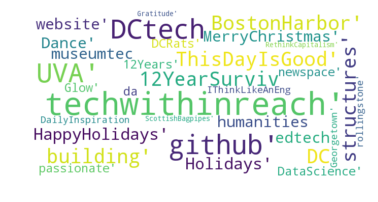

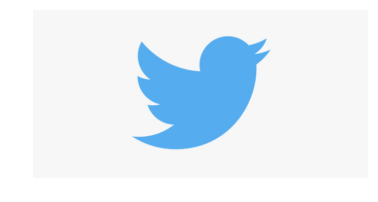

In [86]:
# hashtags
hashtags = str(hashtaglist)

# read the mask
twitter_mask = np.array(Image.open(path.join(d, "twitter.png")))

# wordcloud
wc = WordCloud(background_color="white", max_words=2000, mask=twitter_mask)
# generate word cloud
wc.generate(hashtags)

# store to file
wc.to_file(path.join(d, "twitter_hashtags.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(twitter_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()